In [32]:
%matplotlib inline

import nengo
import nengo_dl
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal

In [2]:
lif_params = {
    'tau_rc': 0.07,
    'tau_ref': 0.0005,
    'amplitude': 0.01
}

# lif parameters
lif_neurons = nengo.LIF(**lif_params)

# softlif parameters (lif parameters + sigma)
softlif_neurons = nengo_dl.SoftLIFRate(**lif_params,
                                       sigma=0.002)

# ensemble parameters
ens_params = dict(max_rates=nengo.dists.Choice([100]), intercepts=nengo.dists.Choice([0]))

In [11]:
co2_data = pd.read_csv('monthly_in_situ_co2_mlo.csv', usecols=[0,4,5,6,7,8,9])
co2_data.columns = ['Date', 'standard', 'season_adjust', 'smoothed', 'smoothed_season', 'standard_no_missing', 'season_no_missing']

In [12]:
co2_data.head()

,Date,standard,season_adjust,smoothed,smoothed_season,standard_no_missing,season_no_missing
0,1958,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,317.46,315.16,317.30,314.98,317.46,315.16
4,1958,317.51,314.72,317.84,315.06,317.51,314.72


(0, 300)

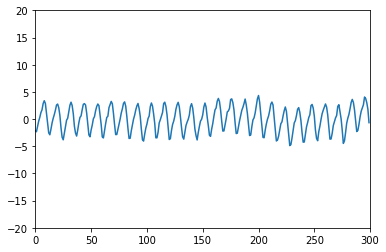

In [44]:
detrended = signal.detrend(co2_data['standard_no_missing'][200:500])
plt.plot(detrended)
plt.ylim([-20,20])
plt.xlim([0,300])

In [45]:
co2_data['standard_no_missing'].shape

(732,)